 There are a lot of definitions for time series, generally it’s defined as a set of data points collected over a period of time. Or speaking in a Pythonic way, it refers to a dataset with a datetime index, and at least one column with numerical values.

 That collection shows how to apply pandas to a time series dataset with an example.
 [Source](https://medium.com/p/c6cb7c0a3680#aca7)

In [125]:
#import libraries

import pandas as pd
import numpy as np
import random
from datetime import datetime 

In [126]:


rows = 55

# generate list of date
dates = pd.bdate_range(datetime(2020, 1, 1), freq='2W', periods=rows).tolist()

# create a dictionary with the date generated and blood sugar level
data = {'date': dates,
        'blood_sugar_level': np.random.normal(5.5, 1, size=(1, rows))[0]}
# create dataframe
df = pd.DataFrame(data)
df = df.sort_values(by=["date"])
df = df.set_index(keys="date")
    
print(df.shape)
df.head(10)

(55, 1)


,blood_sugar_level
date,
2020-01-05,5.068538
2020-01-19,6.003435
2020-02-02,2.989724
2020-02-16,5.802134
2020-03-01,5.964281
2020-03-15,6.555576
2020-03-29,6.548160
2020-04-12,5.384751
2020-04-26,4.979502


### DateTime Format Manipulation

Five methods that can be used for manipulating datetime series.

`pandas.Series.dt.normalize` — Convert times to midnight, 12:00:00.
`pandas.Series.dt.round` — Perform round operation on the data to the specified freq.
`pandas.Series.dt.floor` — Perform floor operation on the data to the specified freq.
`pandas.Series.dt.ceil` — Perform ceil operation on the data to the specified freq.
`pandas.Series.dt.strftime` — Convert to Index using specified date_format.

In [127]:
#Timestamp round

ts = pd.date_range(pd.Timestamp("2023-04-06 12:00"), periods=5, freq='2H')
print("Before normalize\n", ts)
freq = "6H"
ts_norm = ts.normalize()
ts_round = ts.round(freq=freq)
ts_floor = ts.floor(freq=freq)
ts_ceil = ts.ceil(freq=freq)
print("After normalize\n", ts_norm)
print("After round off\n",ts_round)
print("After round off to floor\n",ts_floor)
print("After round off to ceiling\n",ts_ceil)

Before normalize
 DatetimeIndex(['2023-04-06 12:00:00', '2023-04-06 14:00:00',
               '2023-04-06 16:00:00', '2023-04-06 18:00:00',
               '2023-04-06 20:00:00'],
              dtype='datetime64[ns]', freq='2H')
After normalize
 DatetimeIndex(['2023-04-06', '2023-04-06', '2023-04-06', '2023-04-06',
               '2023-04-06'],
              dtype='datetime64[ns]', freq=None)
After round off
 DatetimeIndex(['2023-04-06 12:00:00', '2023-04-06 12:00:00',
               '2023-04-06 18:00:00', '2023-04-06 18:00:00',
               '2023-04-06 18:00:00'],
              dtype='datetime64[ns]', freq=None)
After round off to floor
 DatetimeIndex(['2023-04-06 12:00:00', '2023-04-06 12:00:00',
               '2023-04-06 12:00:00', '2023-04-06 18:00:00',
               '2023-04-06 18:00:00'],
              dtype='datetime64[ns]', freq=None)
After round off to ceiling
 DatetimeIndex(['2023-04-06 12:00:00', '2023-04-06 18:00:00',
               '2023-04-06 18:00:00', '2023-04-06 18:

In [128]:
df['dates'] = df.index

freq = "D"
df["ts_norm"] = df.dates.dt.normalize()
df["ts_round"] = df.dates.dt.round(freq=freq)
df["ts_floor"] = df.dates.dt.floor(freq=freq)
df["ts_ceil"] = df.dates.dt.ceil(freq=freq)
df.head()

,blood_sugar_level,dates,ts_norm,ts_round,ts_floor,ts_ceil
date,,,,,,
2020-01-05,5.068538,2020-01-05,2020-01-05,2020-01-05,2020-01-05,2020-01-05
2020-01-19,6.003435,2020-01-19,2020-01-19,2020-01-19,2020-01-19,2020-01-19
2020-02-02,2.989724,2020-02-02,2020-02-02,2020-02-02,2020-02-02,2020-02-02
2020-02-16,5.802134,2020-02-16,2020-02-16,2020-02-16,2020-02-16,2020-02-16
2020-03-01,5.964281,2020-03-01,2020-03-01,2020-03-01,2020-03-01,2020-03-01


Method to Convert the DateTime Format — `strftime()`

format codes: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [129]:
df["formatted_date"] = df["dates"].dt.strftime('%B %d, %Y')
df.head()

,blood_sugar_level,dates,ts_norm,ts_round,ts_floor,ts_ceil,formatted_date
date,,,,,,,
2020-01-05,5.068538,2020-01-05,2020-01-05,2020-01-05,2020-01-05,2020-01-05,"January 05, 2020"
2020-01-19,6.003435,2020-01-19,2020-01-19,2020-01-19,2020-01-19,2020-01-19,"January 19, 2020"
2020-02-02,2.989724,2020-02-02,2020-02-02,2020-02-02,2020-02-02,2020-02-02,"February 02, 2020"
2020-02-16,5.802134,2020-02-16,2020-02-16,2020-02-16,2020-02-16,2020-02-16,"February 16, 2020"
2020-03-01,5.964281,2020-03-01,2020-03-01,2020-03-01,2020-03-01,2020-03-01,"March 01, 2020"


In [130]:
df["period"] = df["dates"].dt.to_period(freq="M")
print(df[['dates', 'period']].head())

#Create a pivot with groupped records by new monthly period
df_pivot = pd.pivot_table(data=df, index="period", values="blood_sugar_level", aggfunc=np.mean)
df_pivot

                dates   period
date                          
2020-01-05 2020-01-05  2020-01
2020-01-19 2020-01-19  2020-01
2020-02-02 2020-02-02  2020-02
2020-02-16 2020-02-16  2020-02
2020-03-01 2020-03-01  2020-03


,blood_sugar_level
period,
2020-01,5.535987
2020-02,4.395929
2020-03,6.356006
2020-04,5.182127
2020-05,5.794890
2020-06,4.982406
2020-07,5.388507
2020-08,5.859716
2020-09,5.952639


### Time Shift

`pandas.Series.shift` — Shift the time index, using the index’s frequency if available.

In [131]:
df_pivot.shift(periods=1)

,blood_sugar_level
period,
2020-01,NaN
2020-02,5.535987
2020-03,4.395929
2020-04,6.356006
2020-05,5.182127
2020-06,5.794890
2020-07,4.982406
2020-08,5.388507
2020-09,5.859716


In [132]:
print (df_pivot)
df_pivot_new = df_pivot.shift(periods=1)
df_pivot_new.rename(columns= {"blood_sugar_level":"basis"}, inplace=True)
df_pivot = df_pivot.join(df_pivot_new, how="left") 
df_pivot["dif"]= df_pivot["blood_sugar_level"]-df_pivot["basis"]
df_pivot

         blood_sugar_level
period                    
2020-01           5.535987
2020-02           4.395929
2020-03           6.356006
2020-04           5.182127
2020-05           5.794890
2020-06           4.982406
2020-07           5.388507
2020-08           5.859716
2020-09           5.952639
2020-10           4.589725
2020-11           5.252144
2020-12           5.049916
2021-01           6.496740
2021-02           5.809546
2021-03           5.862202
2021-04           6.143448
2021-05           6.266605
2021-06           5.468072
2021-07           6.806935
2021-08           5.963421
2021-09           6.365405
2021-10           6.523652
2021-11           5.233203
2021-12           4.434633
2022-01           4.823898


,blood_sugar_level,basis,dif
period,,,
2020-01,5.535987,NaN,NaN
2020-02,4.395929,5.535987,-1.140057
2020-03,6.356006,4.395929,1.960077
2020-04,5.182127,6.356006,-1.173879
2020-05,5.794890,5.182127,0.612764
2020-06,4.982406,5.794890,-0.812485
2020-07,5.388507,4.982406,0.406101
2020-08,5.859716,5.388507,0.471209
2020-09,5.952639,5.859716,0.092923


#### Converting DateTime to a Particular Period

`pandas.Series.dt.to_period` — Cast to PeriodArray/Index at a particular frequency. Converts DatetimeArray/Index to PeriodArray/Index.

In [133]:
df["period"] = df["dates"].dt.to_period(freq="M")
print(df[['dates', 'period']].head())

#Create a pivot with groupped records by new monthly period
df_pivot = pd.pivot_table(data=df, index="period", values="blood_sugar_level", aggfunc=np.mean)
df_pivot

                dates   period
date                          
2020-01-05 2020-01-05  2020-01
2020-01-19 2020-01-19  2020-01
2020-02-02 2020-02-02  2020-02
2020-02-16 2020-02-16  2020-02
2020-03-01 2020-03-01  2020-03


,blood_sugar_level
period,
2020-01,5.535987
2020-02,4.395929
2020-03,6.356006
2020-04,5.182127
2020-05,5.794890
2020-06,4.982406
2020-07,5.388507
2020-08,5.859716
2020-09,5.952639


In [134]:
ts = pd.date_range(pd.Timestamp("2023-04-06 13:00"), periods=20, freq='W')
print( ts)

ts_period = ts.to_preiod(freq="M").unique()
print(ts_period)

DatetimeIndex(['2023-04-09 13:00:00', '2023-04-16 13:00:00',
               '2023-04-23 13:00:00', '2023-04-30 13:00:00',
               '2023-05-07 13:00:00', '2023-05-14 13:00:00',
               '2023-05-21 13:00:00', '2023-05-28 13:00:00',
               '2023-06-04 13:00:00', '2023-06-11 13:00:00',
               '2023-06-18 13:00:00', '2023-06-25 13:00:00',
               '2023-07-02 13:00:00', '2023-07-09 13:00:00',
               '2023-07-16 13:00:00', '2023-07-23 13:00:00',
               '2023-07-30 13:00:00', '2023-08-06 13:00:00',
               '2023-08-13 13:00:00', '2023-08-20 13:00:00'],
              dtype='datetime64[ns]', freq='W-SUN')


AttributeError: 'DatetimeIndex' object has no attribute 'to_preiod'

In [ ]:
df["week_period"] = df["dates"].dt.to_period(freq="W")
df.head()
df_pivot_week = pd.pivot_table(data=df, index="week_period", values="blood_sugar_level", aggfunc=np.mean)
df_pivot_week.head()

,blood_sugar_level
week_period,
2019-12-30/2020-01-05,3.724122
2020-01-13/2020-01-19,6.111562
2020-01-27/2020-02-02,5.194146
2020-02-10/2020-02-16,4.534674
2020-02-24/2020-03-01,7.189131


### Filtering DateTime Series based on Condition

`pandas.Series.at_time` — Select values at a particular time of day (e.g., 9:30 AM). 
`pandas.Series.between_time` — Select values between particular times of the day (e.g., 9:00–9:30 AM).

In [ ]:
df.at_time('8:00').head()

,blood_sugar_level,dates,ts_norm,ts_round,ts_floor,ts_ceil,formatted_date,period,week_period
date,,,,,,,,,


In [135]:
df.between_time(start_time="19:00", end_time="21:00").head()

,blood_sugar_level,dates,ts_norm,ts_round,ts_floor,ts_ceil,formatted_date,period
date,,,,,,,,


In [136]:
df_pivot.resample("Q").mean()

,blood_sugar_level
period,
2020Q1,5.429307
2020Q2,5.319808
2020Q3,5.733621
2020Q4,4.963928
2021Q1,6.056163
2021Q2,5.959375
2021Q3,6.378587
2021Q4,5.397163
2022Q1,4.823898


### Resampling Time Series

`pandas.Series.resample` — Convenience method for frequency conversion and resampling of time series. The object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or the caller must pass the label of a datetime-like series/index to the on/level keyword parameter.

In [ ]:
df_pivot.resample("Y").mean()

<AxesSubplot:title={'center':"Blood Sugar Level Record from Jul'20 - Jun'21"}, xlabel='Date', ylabel='Blood Sugar Level'>

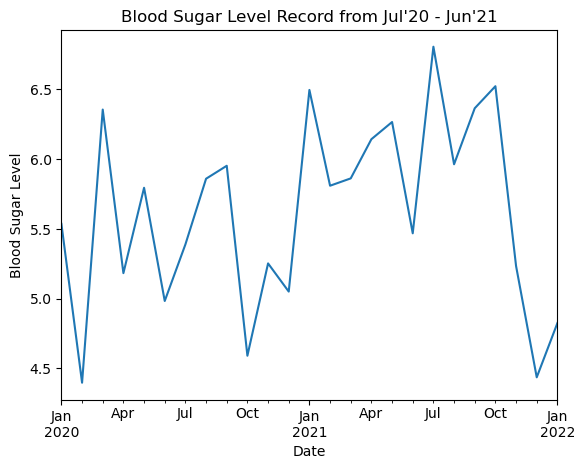

In [137]:
df_pivot["blood_sugar_level"].plot(title="Blood Sugar Level Record from Jul'20 - Jun'21", xlabel="Date", ylabel="Blood Sugar Level")